<a href="https://colab.research.google.com/github/GaikwadSandesh/HotelBookingAnalysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data 

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alma_better/EDA _Project/Hotel _Bookings.csv')
dataframe.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
dataframe.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Info of each column
*   holets :  data of two hotel city holet and resort hotel
*   is canceled : booking status
*   lead time : how many dayts before the arrival date booking was done
*   arrival_date_year , arrival_date_month, arrival_date_week_number arrival_date_day_of_month : selft explanatory
*   meal : which type of meal was ordered with room booking
 all other column are self expanatory by column name
*   all other column are self expanatory by column name

# Data cleaning and Null value handling

In [ ]:
dataframe.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
print(round(100*(dataframe.isnull().sum()/len(dataframe.index)),2))

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


Handling Null vaules - 
* We can use most comman value for children and country.

* 94 percent data is missing for company value and 13.69 percent data is missing for agents

* We will drop the company and agent column straight away as it is missing most value , 

In [ ]:
df = dataframe.drop(columns =['company' , 'agent'])

In [ ]:
df.fillna(df.mode().iloc[0] , inplace = True)

In [ ]:
df = df.drop(df[df.adr < 0].index)

### we will inspect each column now and keep only those columns which are related to cancellation of booking

# EDA

## Hotel Column

In [ ]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
# lets get percentage of booking for each column
df['hotel'].value_counts(normalize = True).to_frame() 

,hotel
City Hotel,0.664467
Resort Hotel,0.335533


In [ ]:
df.groupby(['hotel'])['is_canceled'].value_counts(normalize = True).to_frame().unstack()

is_canceled         
is_canceled            0        1
hotel                            
City Hotel       0.58273  0.41727
Resort Hotel     0.72236  0.27764

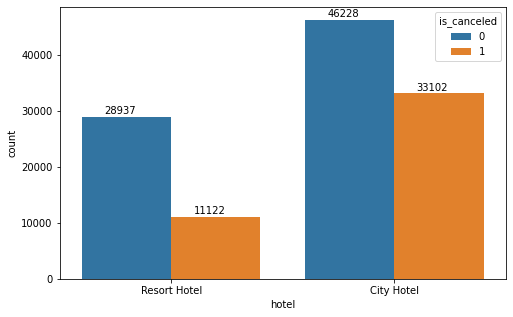

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x = 'hotel' , data=df , hue='is_canceled')
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() +0.1, p.get_height()+500))

* Out of all bookings 66.4 % booking are for city hotel and 33.6  % bookings are for resort hotel
* City hoetl also has highest cancelation compared to resort hotel city hotel has cancelation of 41 % on the other hand resort hotel has less cancelation 

## Modify date 


we will convert arrivel date month ,  date and year as one date column to make data redable . and drop the old columns

In [ ]:
df['arrival_date'] = df['arrival_date_day_of_month'].astype(str) + '-' + df['arrival_date_month'].astype(str) + '-' +df['arrival_date_year'].astype(str)
df['arrival_date']= pd.to_datetime(df['arrival_date'])

In [ ]:
df['arrival_day'] = df['arrival_date'].dt.day_name()

In [ ]:
#df.drop(columns=['arrival_date_day_of_month' , 'arrival_date_month' ,'arrival_date_year' , 'arrival_date_week_number' , 'reservation_status_date' ], inplace = True)

##Meal column

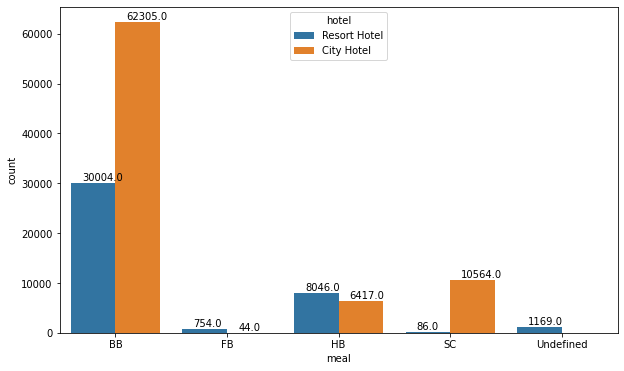

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x = 'meal' , data=df, hue='hotel')
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() +0.1, p.get_height()+500) , fontsize = 10)

In [ ]:
df.drop(columns = ['meal'], inplace= True)

Meal can only mesure quality of service both hotels offers all standered meals packages and this parameter will be applicable for repeat custmores only . This parametere will be taen into account with cancelaltion of repeat custmores so we can eliminitate this column for time being . we can check cancellation for each meal time and rate of cancellation for for repeat cusmoers but that will be too naive to assume only meal parameter is of concern for cancellation of repeat custmoer

##Columns related to number of peoples

In [ ]:
children_df = df.groupby([ 'children'])['is_canceled'].value_counts(normalize=True).to_frame()
children_df

is_canceled
children is_canceled             
0.0      0               0.629076
         1               0.370924
1.0      0               0.677638
         1               0.322362
2.0      0               0.578039
         1               0.421961
3.0      0               0.776316
         1               0.223684
10.0     1               1.000000

In [ ]:
baibies_df = df.groupby([ 'babies'])['is_canceled'].value_counts(normalize=True).to_frame()
baibies_df

is_canceled
babies is_canceled             
0      0               0.628123
       1               0.371877
1      0               0.816667
       1               0.183333
2      0               0.866667
       1               0.133333
9      0               1.000000
10     0               1.000000

In [ ]:
df['people'] = df['adults'] + df['children'] +df['babies']

In [ ]:
#df.drop(columns = ['children' , 'babies' , 'adults'], inplace= True)`a

* Number of children , babies, adults has nothig to do with cancellation rate there is more cancellation for higher adults but its already captured in market segment category we can drop these coulums 

* one thing is noticable that cancellation for couples with babies is lower than the cancellation for people without babies this is maybe because people with babies plan their trip only if they are sure or the trip is essential which can not be avoided . It is just guess .

## Weekday-Weekend stay

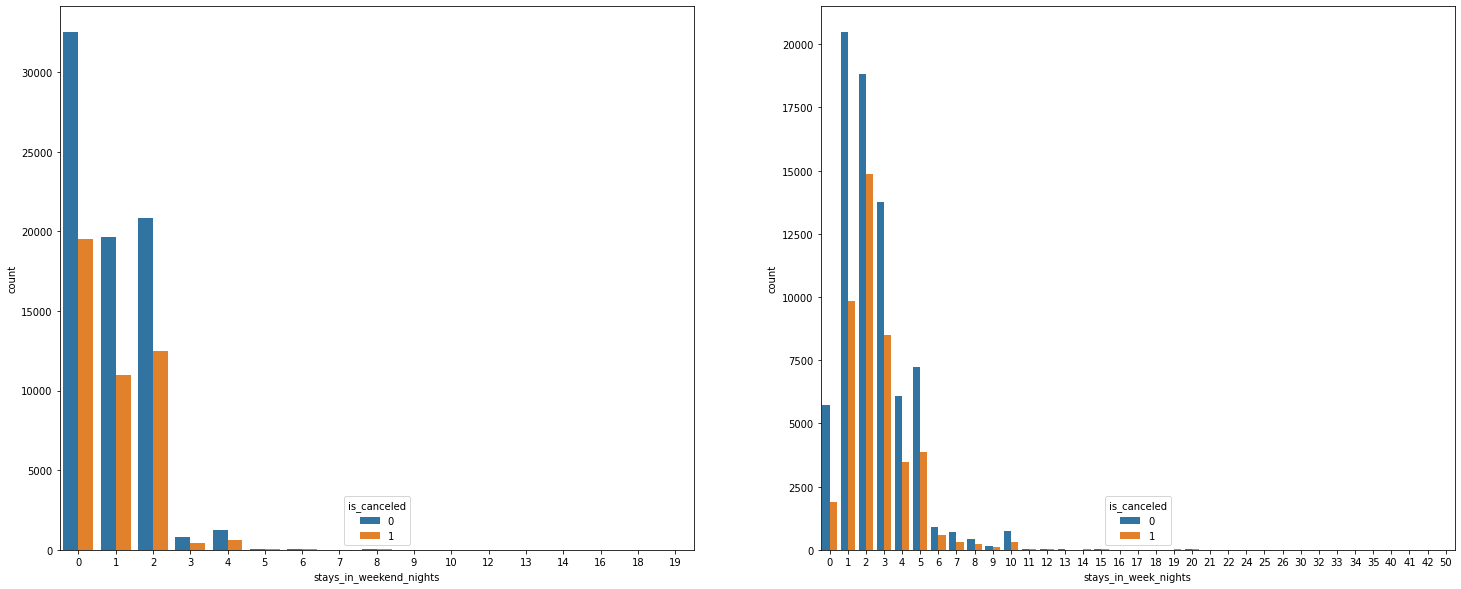

In [ ]:
fig , axis =plt.subplots(1, 2, figsize=(25,10))
sns.countplot(x = 'stays_in_weekend_nights', data=df, hue='is_canceled' , ax=axis[0] )
sns.countplot(x = 'stays_in_week_nights'   , data=df, hue='is_canceled' , ax =axis[1])

avg cancelation for weekday and weekend booking is almost same so there is no point in further analaysis of this data . we can drop this two columns

In [ ]:
# df.drop(columns = ['stays_in_weekend_nights' , 'stays_in_week_nights'], inplace= True)

## Lead time

Text(0.5, 1.0, 'Booking Data for 2017')

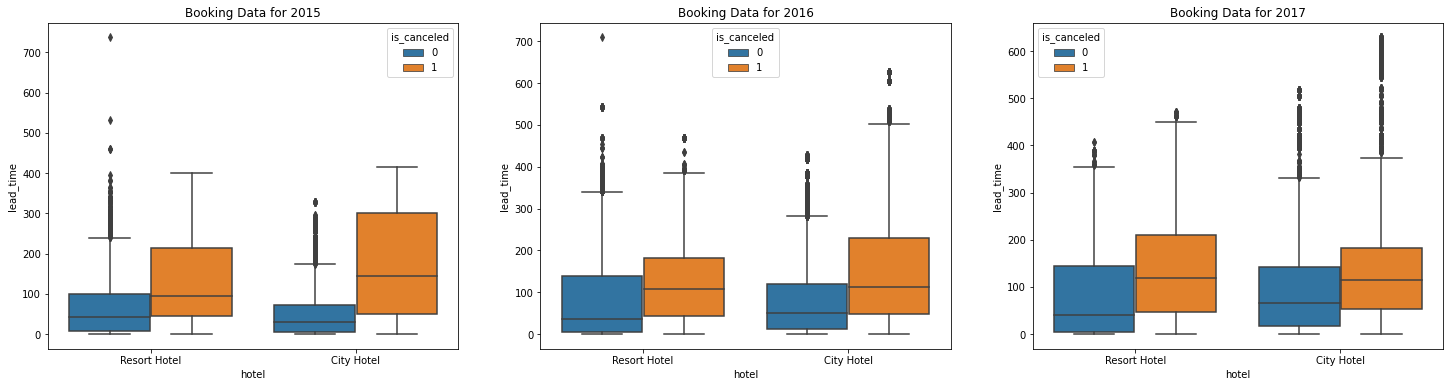

In [ ]:
fig , axis = plt.subplots(1,3 ,figsize=(25,6))
ax15 = sns.boxplot(y = 'lead_time', x= 'hotel',data=df.loc[df['arrival_date_year'] == 2015] , hue='is_canceled' , ax= axis[0])
ax16 =sns.boxplot(y = 'lead_time', x= 'hotel',data=df.loc[df['arrival_date_year'] == 2016] , hue='is_canceled' , ax= axis[1])
ax17 =sns.boxplot(y = 'lead_time', x= 'hotel',data=df.loc[df['arrival_date_year'] == 2017] , hue='is_canceled' , ax= axis[2])
ax15.set_title('Booking Data for 2015')
ax16.set_title('Booking Data for 2016')
ax17.set_title('Booking Data for 2017')

* We can observe that people with higher lead times have a higher cancellation rate . 
* To avoid losses either the Hotel can ask to reconfirm the booking a few days prior to the booking date or charge a refundable booking deposit as the hotel will get free cash for a long duration
* 125 days seems like a Good threshold to apply above changes 

##Repeated guset type

In [ ]:
df.groupby(['hotel'])['is_repeated_guest'].value_counts(normalize = True).to_frame().unstack()

is_repeated_guest          
is_repeated_guest                 0         1
hotel                                        
City Hotel                 0.974385  0.025615
Resort Hotel               0.955640  0.044360

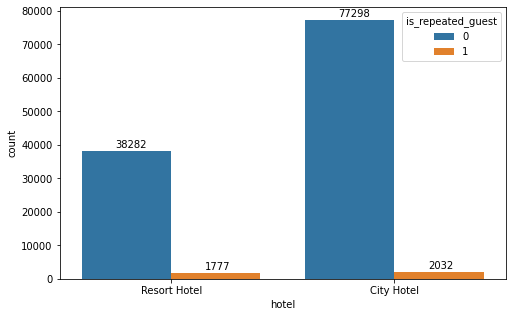

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x = 'hotel' , data=df , hue='is_repeated_guest')
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() +0.15, p.get_height()+1000))

Repeated guest are very few in numbers

In [ ]:
# insted of doing group by every time we create a data frames for each hotel
Resort_df = df.loc[df['hotel'] == 'Resort Hotel']
City_df = df.loc[df['hotel'] == 'City Hotel']

In [ ]:
resort_repeated =  Resort_df.loc[Resort_df['is_repeated_guest'] == 1]['is_canceled'].value_counts() 
resort_new      =  Resort_df.loc[Resort_df['is_repeated_guest'] == 0]['is_canceled'].value_counts()
city_repeated   =  City_df.loc[City_df['is_repeated_guest'] == 1]['is_canceled'].value_counts()
city_new        =  City_df.loc[City_df['is_repeated_guest'] == 1]['is_canceled'].value_counts()

In [ ]:
city_new

0    1591
1     441
Name: is_canceled, dtype: int64

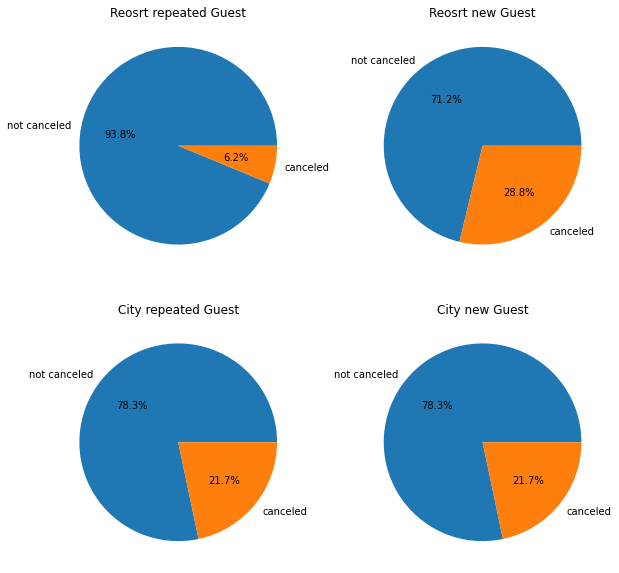

In [ ]:
label = ('not canceled' , 'canceled' )
fig , axis = plt.subplots(2,2 ,figsize=(10,10))

axis[0,0].pie(resort_repeated , labels=label, autopct='%1.1f%%')
axis[0,1].pie(resort_new ,      labels=label, autopct='%1.1f%%')
axis[1,0].pie(city_repeated ,   labels=label, autopct='%1.1f%%')
axis[1,1].pie(city_new ,        labels=label, autopct='%1.1f%%')

axis[0,0].set_title('Reosrt repeated Guest')
axis[0,1].set_title('Reosrt new Guest')
axis[1,0].set_title('City repeated Guest')
axis[1,1].set_title('City new Guest' )

plt.show()

* overall repeated guests are very few compareed to new guest Resort Hotel has 4.5 percentage reaped guest while city has only 2.7 percentage repeated guet
* Resort also has significantly lower cancelation compared to city
* cancellation for new custmores is almost same for both Resort and City hotel

we can see car paking is not an issue and can be dropped as all the cancellation are from those who don't need car parking

## Special Request

In [ ]:
special_request_df = df.groupby(['is_canceled' , 'hotel'])['total_of_special_requests'].value_counts(normalize = True).to_frame()
special_request_df

total_of_special_requests
is_canceled hotel        total_of_special_requests                           
0           City Hotel   0                                           0.467617
                         1                                           0.361231
                         2                                           0.138509
                         3                                           0.028273
                         4                                           0.003829
                         5                                           0.000541
            Resort Hotel 0                                           0.523344
                         1                                           0.318243
                         2                                           0.127864
                         3                                           0.025711
                         4                                           0.004389
                         5                                           0.000449
1           City Hotel   0                                           0.795722
                         1                                           0.142620
                         2                                           0.052535
                         3                                           0.008459
                         4                                           0.000634
                         5                                           0.000030
            Resort Hotel 0                                           0.648804
                         1                                           0.233501
                         2                                           0.101331
                         3                                           0.014925
                         4                                           0.001349
                         5                                           0.000090

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


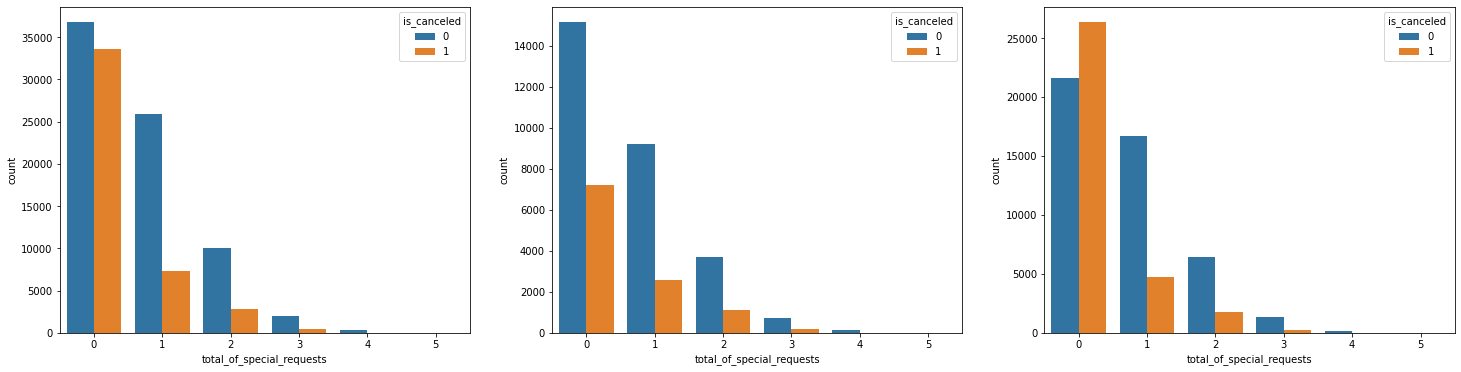

In [ ]:

fig , axis = plt.subplots(1,3 ,figsize=(25,6))

ax0 =sns.countplot('total_of_special_requests' , data = df , hue='is_canceled' , ax = axis[0])
ax1 =sns.countplot('total_of_special_requests' , data = Resort_df , hue='is_canceled' , ax = axis[1])
ax2 =sns.countplot('total_of_special_requests' , data = City_df , hue='is_canceled' , ax = axis[2])

we can see the cancellation is not increseing as the special request increse so for now we can drop the column

## Deposit

In [ ]:
df['deposit_type'].value_counts()

No Deposit    104640
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [ ]:
deposittype_df = df.groupby(['deposit_type'])['is_canceled'].value_counts().to_frame().unstack()
deposittype_df_N = df.groupby(['deposit_type'])['is_canceled'].value_counts(normalize= True).to_frame().unstack()
deposittype_df

is_canceled       
is_canceled            0      1
deposit_type                   
No Deposit         74946  29694
Non Refund            93  14494
Refundable           126     36

In [ ]:
deposittype_df_N

is_canceled          
is_canceled            0         1
deposit_type                      
No Deposit      0.716227  0.283773
Non Refund      0.006376  0.993624
Refundable      0.777778  0.222222

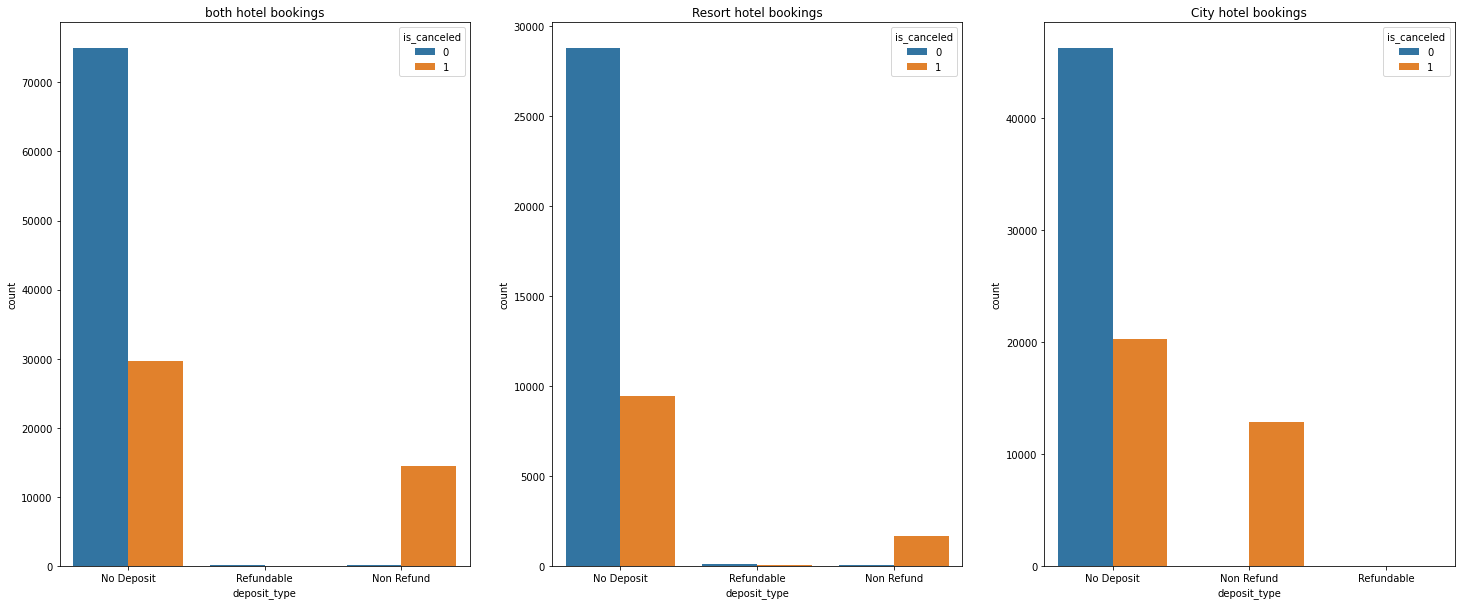

In [ ]:
fig , axis =plt.subplots(1, 3, figsize=(25,10))
ax_all =sns.countplot(x = 'deposit_type', data=df, hue='is_canceled' , ax=axis[0] )
ax_resort =sns.countplot(x = 'deposit_type', data=Resort_df, hue='is_canceled' , ax=axis[1] )
ax_city =sns.countplot(x = 'deposit_type', data=City_df, hue='is_canceled' , ax=axis[2] )
ax_all.set_title('both hotel bookings')
ax_resort.set_title('Resort hotel bookings')
ax_city.set_title('City hotel bookings')
plt.show()

* we can see the most of the bookings  are for No deposite categorie
* the cancellation is significantly higher for non refundable category
* refundable has very few bookings so it won't be fair to compare

It is very contrary to what should ideally happen but the good thing is the hotel is making a few bucks from these bookings. Probably hotel has its own system which checks the probability of cancellation and asks for deposit

## Market segment

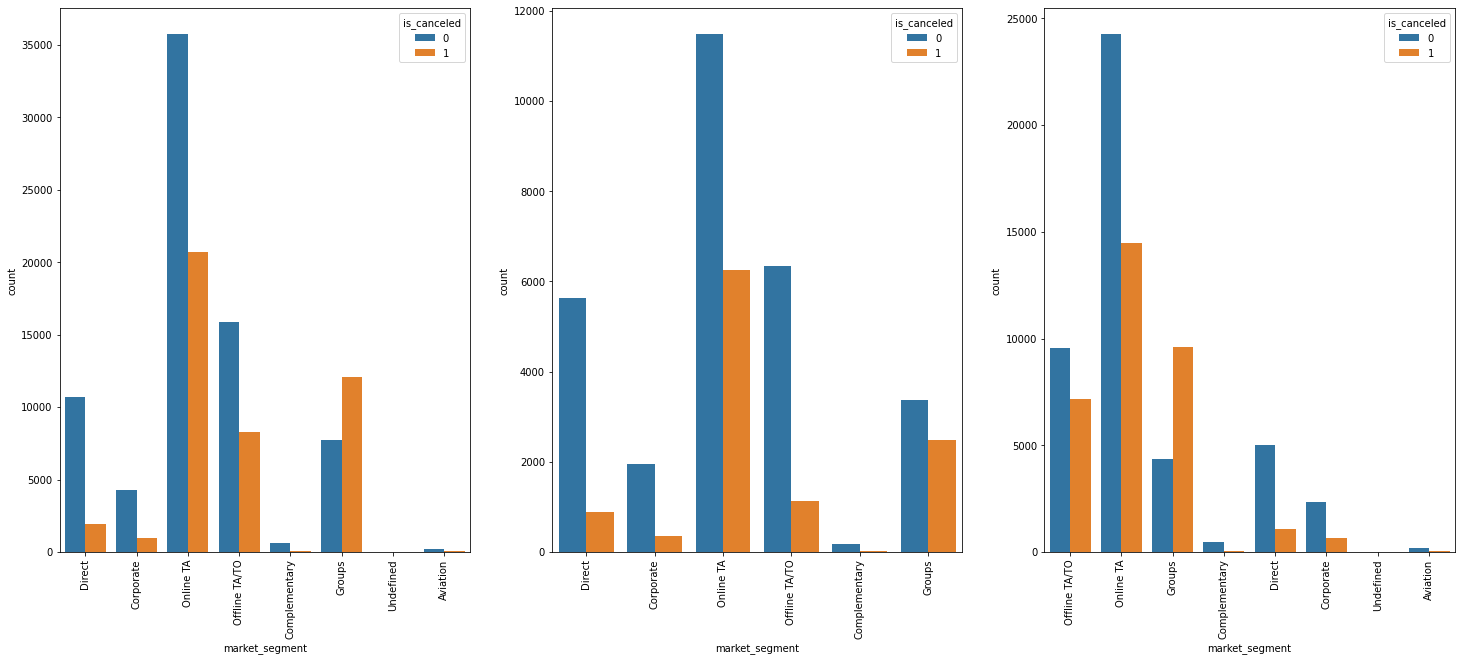

In [ ]:
fig , axis =plt.subplots(1, 3, figsize=(25,10))
sns.countplot(x = 'market_segment', data=df, hue='is_canceled' , ax=axis[0] )
sns.countplot(x = 'market_segment', data=Resort_df, hue='is_canceled' , ax=axis[1] )
sns.countplot(x = 'market_segment', data=City_df, hue='is_canceled' , ax=axis[2] )
axis[0].set_xticklabels(axis[0].get_xticklabels() ,rotation=90)
axis[1].set_xticklabels(axis[1].get_xticklabels() ,rotation=90)
axis[2].set_xticklabels(axis[2].get_xticklabels() ,rotation=90)
plt.show()

* Canceleation pattern remains almost same for Resort Hotel and City hotel .
* Only groups category in Resort hotel has higher cancellation. while city hotel does really good job group custmoers, as it is the only segment where cancelation are almost half of no cancelation  

## Month wise analysis each hotel

In [ ]:
cancelation_by_month = df.pivot_table(index='arrival_date_month' )['is_canceled'].to_frame()

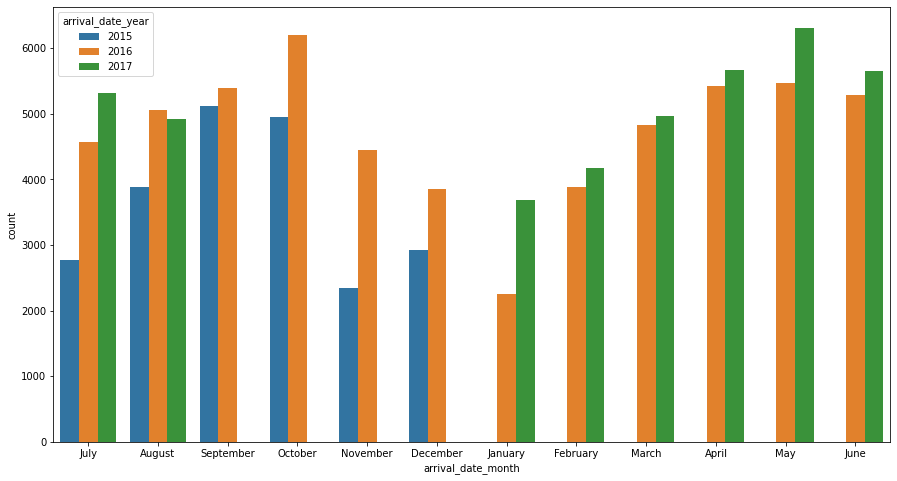

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'arrival_date_month', data=df, hue='arrival_date_year' )

* we can see the boking are increasing years on year growth for all hotels

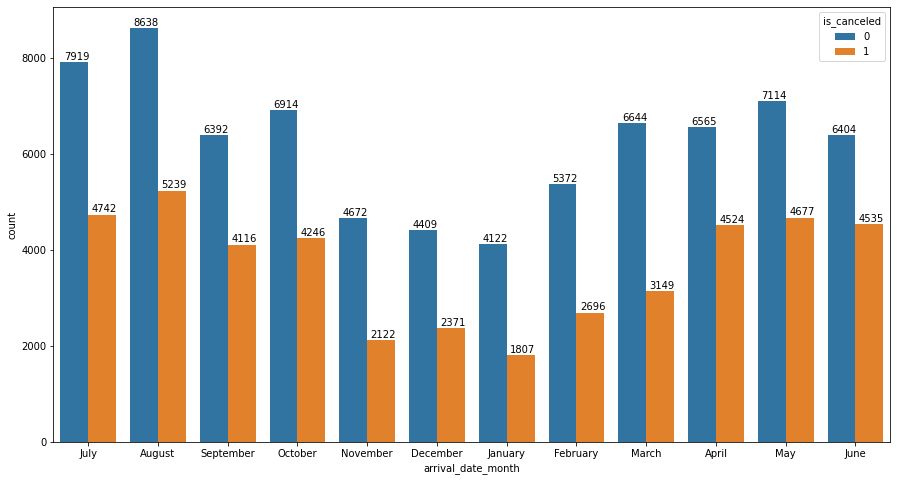

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x = 'arrival_date_month', data=df, hue='is_canceled'  )
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() +0.05, p.get_height()+50))

In [ ]:
month_df = df.groupby(['arrival_date_month'])['is_canceled'].value_counts(normalize= True).to_frame().unstack(level = 0)
month_df

is_canceled                                         \
arrival_date_month       April    August  December February   January   
is_canceled                                                             
0                     0.592028  0.622469  0.650295  0.66584  0.695227   
1                     0.407972  0.377531  0.349705  0.33416  0.304773   

                                                                      \
arrival_date_month      July      June     March       May  November   
is_canceled                                                            
0                   0.625464  0.585428  0.678444  0.603342  0.687666   
1                   0.374536  0.414572  0.321556  0.396658  0.312334   

                                        
arrival_date_month   October September  
is_canceled                             
0                   0.619534  0.608298  
1                   0.380466  0.391702

## Distribution Channel 

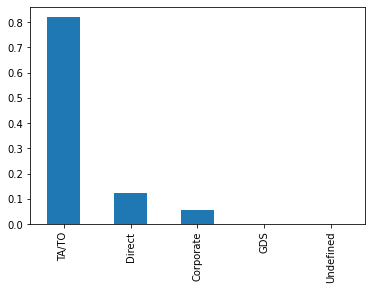

In [ ]:
df['distribution_channel'].value_counts(normalize=True).plot(kind ='bar')

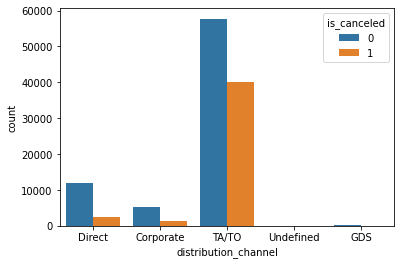

In [ ]:
sns.countplot(x = 'distribution_channel' , data=df, hue='is_canceled' )

## Reserved_room_type

In [ ]:
df.groupby(['reserved_room_type' , 'hotel'])['is_canceled'].value_counts().unstack(level = 1).fillna(0 )

hotel                           City Hotel  Resort Hotel
reserved_room_type is_canceled                          
A                  0               35347.0       17016.0
                   1               27248.0        6382.0
B                  0                 747.0           3.0
                   1                 368.0           0.0
C                  0                   9.0         615.0
                   1                   5.0         303.0
D                  0                7621.0        5478.0
                   1                4147.0        1955.0
E                  0                1048.0        3573.0
                   1                 505.0        1409.0
F                  0                1091.0         926.0
                   1                 700.0         180.0
G                  0                 365.0         966.0
                   1                 119.0         644.0
H                  0                   0.0         356.0
                   1                   0.0         245.0
L                  0                   0.0           4.0
                   1                   0.0           2.0
P                  1                  10.0           2.0

In [ ]:
df.groupby(['reserved_room_type' , 'hotel'])['is_canceled'].value_counts(normalize =True).unstack(level = 1).fillna(0 )

hotel                           City Hotel  Resort Hotel
reserved_room_type is_canceled                          
A                  0              0.564694      0.727242
                   1              0.435306      0.272758
B                  0              0.669955      1.000000
                   1              0.330045      0.000000
C                  0              0.642857      0.669935
                   1              0.357143      0.330065
D                  0              0.647604      0.736984
                   1              0.352396      0.263016
E                  0              0.674823      0.717182
                   1              0.325177      0.282818
F                  0              0.609157      0.837251
                   1              0.390843      0.162749
G                  0              0.754132      0.600000
                   1              0.245868      0.400000
H                  0              0.000000      0.592346
                   1              0.000000      0.407654
L                  0              0.000000      0.666667
                   1              0.000000      0.333333
P                  1              1.000000      1.000000

## Previous Cancellation

In [ ]:
df.loc[df['is_repeated_guest'] == 1]['previous_cancellations'].value_counts(normalize = True)

0     0.756629
1     0.181938
2     0.019953
3     0.013652
4     0.008139
11    0.007088
5     0.004988
6     0.004201
13    0.003150
21    0.000263
Name: previous_cancellations, dtype: float64

In [ ]:
df.loc[df['is_repeated_guest'] == 1].groupby(['previous_cancellations'])['is_canceled'].value_counts(normalize = True).to_frame().unstack().fillna(0)

is_canceled          
is_canceled                      0         1
previous_cancellations                      
0                         0.968772  0.031228
1                         0.402597  0.597403
2                         0.789474  0.210526
3                         0.846154  0.153846
4                         0.774194  0.225806
5                         0.894737  0.105263
6                         0.937500  0.062500
11                        0.925926  0.074074
13                        0.083333  0.916667
21                        0.000000  1.000000

* Repeated custmore with no previous cancelation have very less percentage of booking cancelation 
* People who have canceled once have more cancelation
* The ones who have canceled twice have small cancelation but the numbers are small so it can't be trusted and seems counter intuative .
* Compared with one cancelation overall people with more cancelation have higher chance of cancelation it is hotel should charge some deposite from this cusmore to improve profit

## Avg daily check in by month 

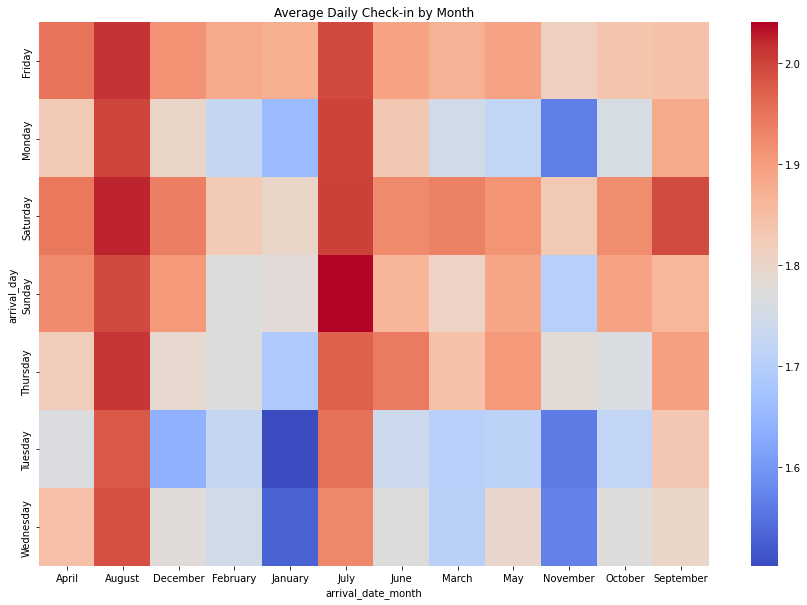

In [ ]:
checkinday = df.groupby(['arrival_day', 'arrival_date_month']).mean()['adults'].unstack(level = -1)
plt.figure(figsize = (15,10))
sns.heatmap(checkinday, cmap = 'coolwarm')
plt.title("Average Daily Check-in by Month")
plt.show()

In [ ]:
df.iloc[8]

hotel                                    Resort Hotel
is_canceled                                         1
lead_time                                          85
arrival_date_year                                2015
arrival_date_month                               July
arrival_date_week_number                           27
arrival_date_day_of_month                           1
stays_in_weekend_nights                             0
stays_in_week_nights                                3
adults                                              2
children                                          0.0
babies                                              0
country                                           PRT
market_segment                              Online TA
distribution_channel                            TA/TO
is_repeated_guest                                   0
previous_cancellations                              0
previous_bookings_not_canceled                      0
reserved_room_type          

## Expected Money Spend

In [ ]:
df['money_spent'] = df['adr']* (df['stays_in_weekend_nights'] + df['stays_in_week_nights'] )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119389 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119389 non-null  object        
 1   is_canceled                     119389 non-null  int64         
 2   lead_time                       119389 non-null  int64         
 3   arrival_date_year               119389 non-null  int64         
 4   arrival_date_month              119389 non-null  object        
 5   arrival_date_week_number        119389 non-null  int64         
 6   arrival_date_day_of_month       119389 non-null  int64         
 7   stays_in_weekend_nights         119389 non-null  int64         
 8   stays_in_week_nights            119389 non-null  int64         
 9   adults                          119389 non-null  int64         
 10  children                        119389 non-null  float64